In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/twitter-data/Twitter_Data.csv')

In [3]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [5]:
df = df.dropna()

In [6]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [7]:
df.clean_text = df['clean_text'].apply(data_processing)

In [8]:
def sentiment(label):
    if label == 0:
        return "Neutral"
    elif label < 0:
        return "Negative"
    elif label > 0:
        return "Positive"

In [9]:
df['sentiment'] = df['category'].apply(sentiment)

In [10]:
df.head()

,clean_text,category,sentiment
0,modi promised minimum government maximum gover...,-1.0,Negative
1,talk nonsense continue drama vote modi,0.0,Neutral
2,say vote modi welcome bjp told rahul main camp...,1.0,Positive
3,asking supporters prefix chowkidar names modi ...,1.0,Positive
4,answer among powerful world leader today trump...,1.0,Positive


<Axes: xlabel='sentiment', ylabel='count'>

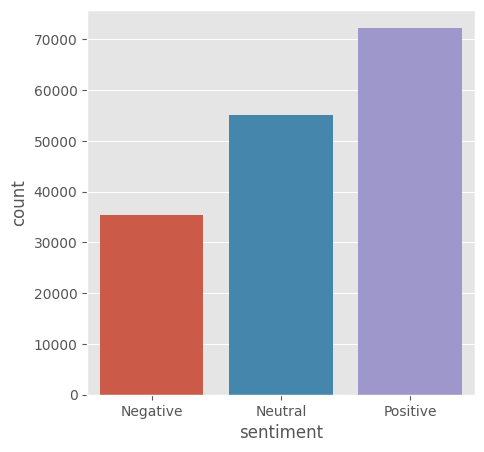

In [11]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

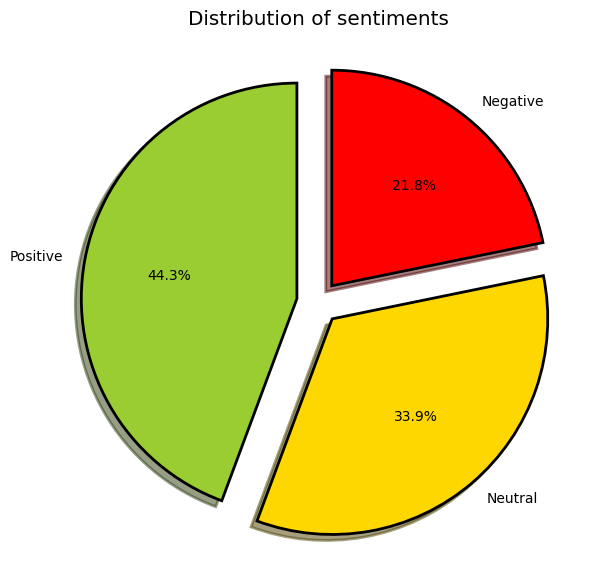

In [12]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [13]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['category'], ascending= False)
pos_tweets.head()

,clean_text,category,sentiment
2,say vote modi welcome bjp told rahul main camp...,1.0,Positive
108013,mam ask question brother mom sitting mps modi ...,1.0,Positive
108020,political parties polls meet expectations vote...,1.0,Positive
108019,rahul sure half followers modi bhakt remains c...,1.0,Positive
108018,sanjay singh right modi kaput interrogated,1.0,Positive


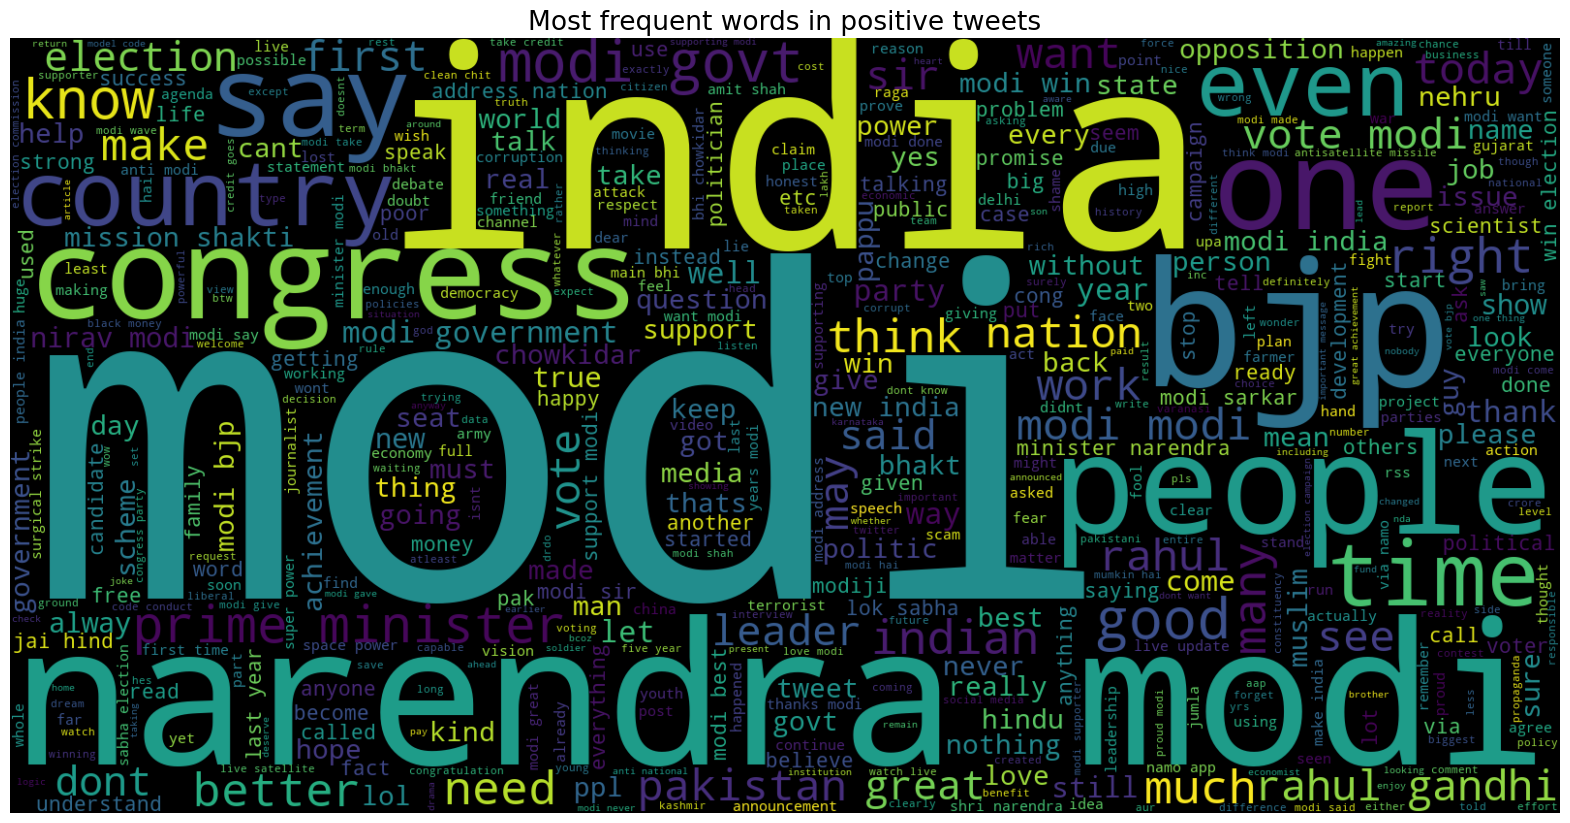

In [14]:
text = ' '.join([word for word in pos_tweets['clean_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [15]:
neg_tweets = df[df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['category'], ascending= False)
neg_tweets.head()

,clean_text,category,sentiment
0,modi promised minimum government maximum gover...,-1.0,Negative
109260,bhai dont spread half truth defame modi,-1.0,Negative
109239,khuda kasam put modi jail national conference ...,-1.0,Negative
109240,mrmodi people already given one chance helped ...,-1.0,Negative
109243,modijaitley gadkari saying possible mean theyr...,-1.0,Negative


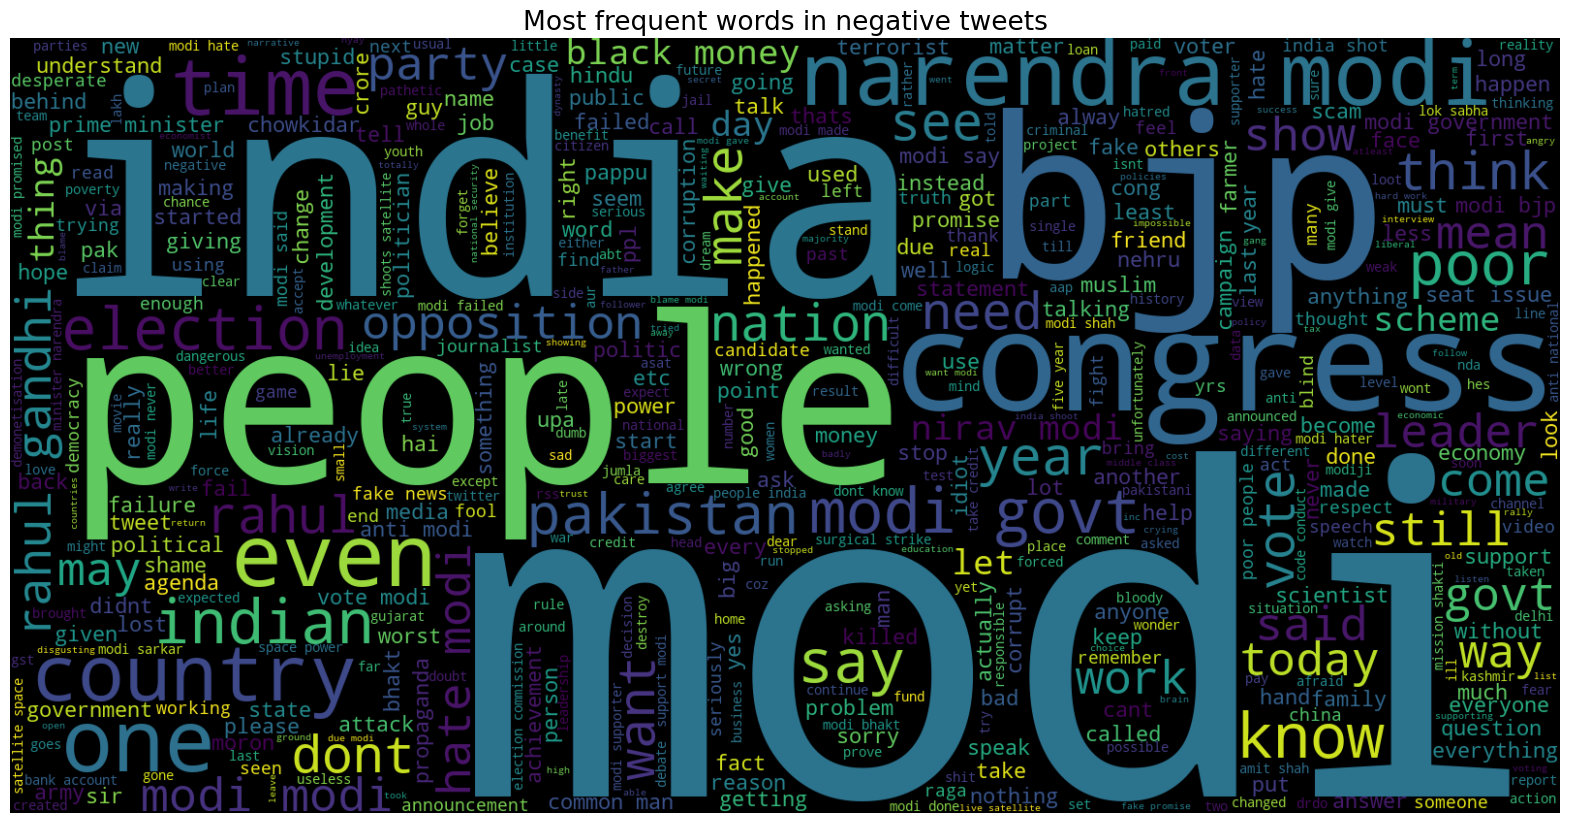

In [16]:
text = ' '.join([word for word in neg_tweets['clean_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [17]:
neutral_tweets = df[df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['category'], ascending= False)
neutral_tweets.head()

,clean_text,category,sentiment
1,talk nonsense continue drama vote modi,0.0,Neutral
108899,perception madam today urmila mataondkar say i...,0.0,Neutral
108905,voting modi threat constitution bolne wale bhi...,0.0,Neutral
108914,modi said give tax incentives years demand tax...,0.0,Neutral
108915,modi spoke white paper wish arnab asked releas...,0.0,Neutral


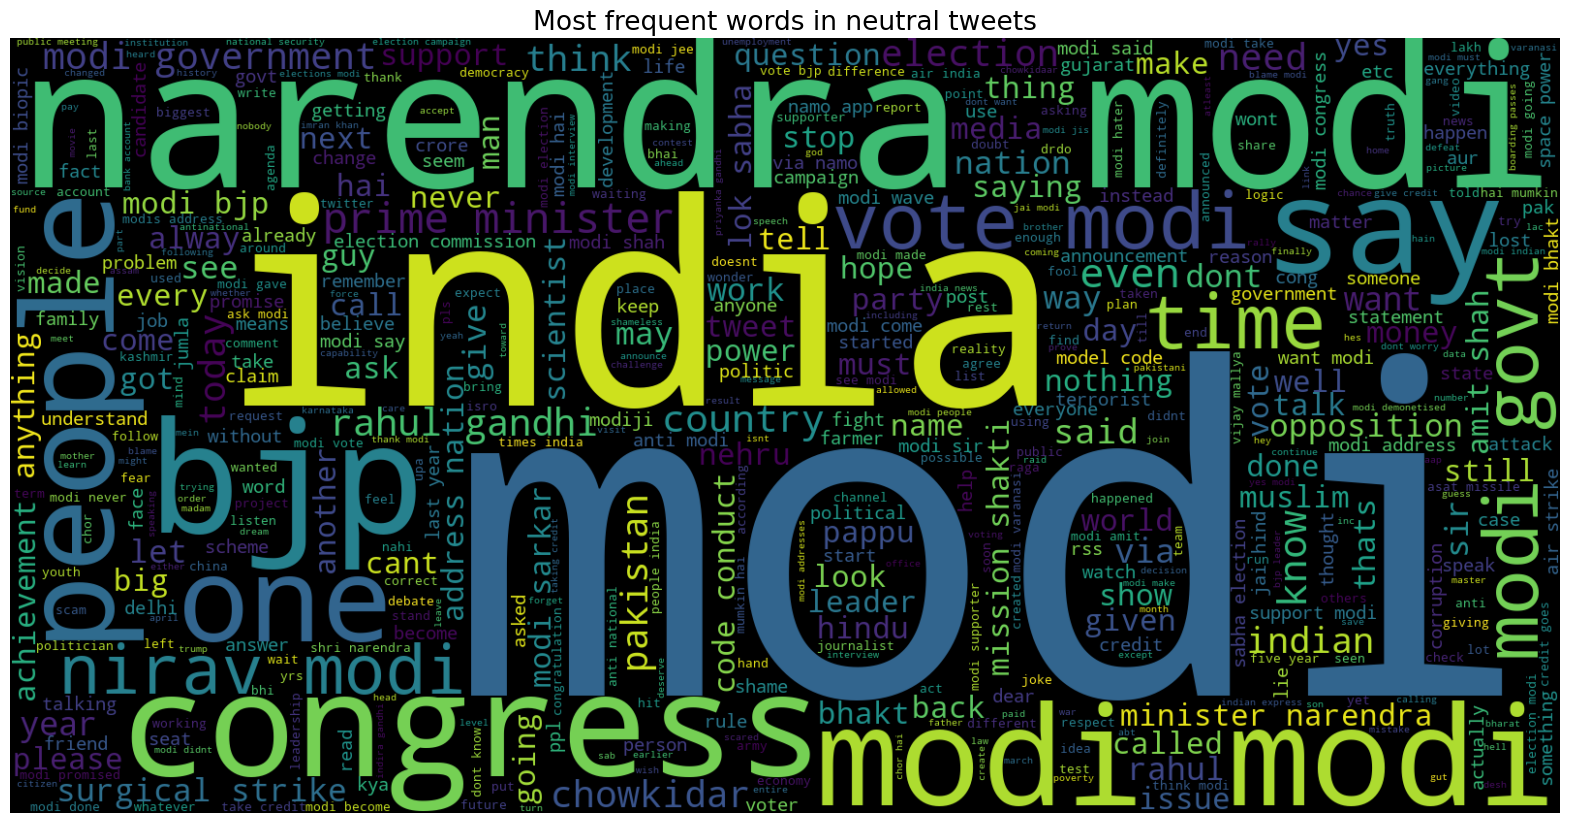

In [18]:
text = ' '.join([word for word in neutral_tweets['clean_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [19]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['clean_text'])

In [20]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 1194650

First 20 features:
 ['000' '000 00000' '000 21000' '000 333' '000 buy' '000 clean' '000 crore'
 '000 crs' '000 death' '000 deaths' '000 income' '000 knowledge'
 '000 modi' '000 month' '000 per' '000 pocket' '000 poor' '000 problem'
 '000 promised' '000 vanautunear']


In [21]:
X = df['clean_text']
Y = df['sentiment']
X = vect.transform(X)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (130375, 1194650)
Size of y_train: (130375,)
Size of x_test: (32594, 1194650)
Size of y_test: (32594,)


In [24]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.62%


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 5682   664   806]
 [  126 10705   236]
 [  690   860 12825]]


              precision    recall  f1-score   support

    Negative       0.87      0.79      0.83      7152
     Neutral       0.88      0.97      0.92     11067
    Positive       0.92      0.89      0.91     14375

    accuracy                           0.90     32594
   macro avg       0.89      0.88      0.89     32594
weighted avg       0.90      0.90      0.90     32594



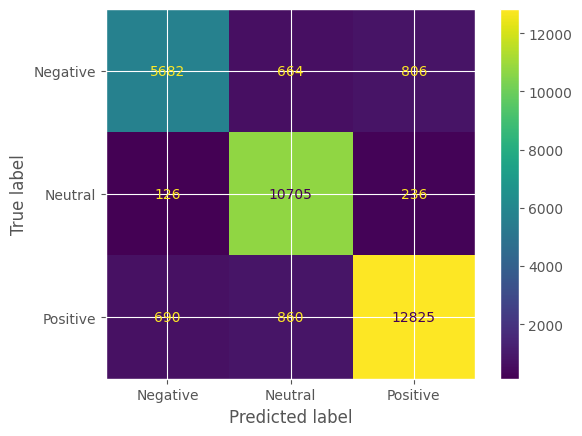

In [26]:
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [27]:
from sklearn.svm import LinearSVC

In [28]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [29]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 90.23%


In [30]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 5825   553   774]
 [  143 10667   257]
 [  698   760 12917]]


              precision    recall  f1-score   support

    Negative       0.87      0.81      0.84      7152
     Neutral       0.89      0.96      0.93     11067
    Positive       0.93      0.90      0.91     14375

    accuracy                           0.90     32594
   macro avg       0.90      0.89      0.89     32594
weighted avg       0.90      0.90      0.90     32594



In [31]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}

grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [ ]:
print("Best parameter:", grid.best_params_)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

In [ ]:
import joblib

best_svc_model = grid.best_estimator_
joblib.dump(best_svc_model, 'best_svc_model.pkl')

In [ ]:
temp = vect.transform(['I love you'])
grid.predict(temp)

In [ ]:
x_test